In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

6,6.jpg,19379

19379


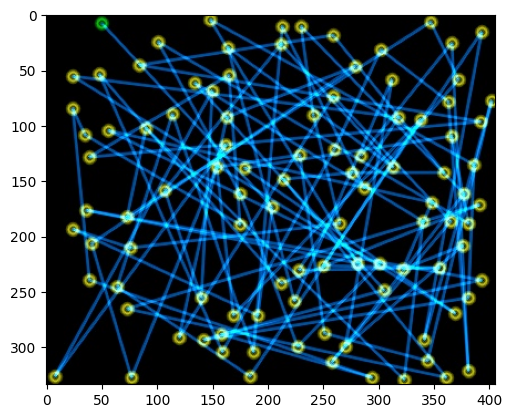

In [2]:
pic_num = 6

image = mpimg.imread(f'tsp-cv/{pic_num}.jpg')

with open('tsp-cv/train.csv') as f:
    for i, line in enumerate(f):
        if i == pic_num+1:
            print(line)
            true_lenght = int(line.split(',')[2])
            break

print(true_lenght)
plt.imshow(image)

In [3]:
import circle_detection_functions
import line_detection_functions

from functools import partial

In [4]:
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)
line_detecter_function = partial(line_detection_functions.get_next_pos)

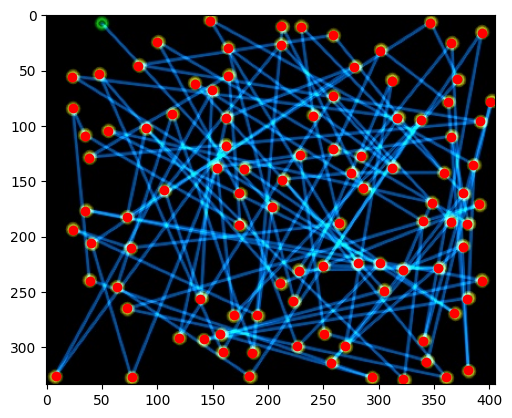

In [5]:
#detect the circles
detected_positions = list(circle_detecter_function(image))

plt.imshow(image)
for p in detected_positions:
    plt.plot(p[0], p[1], 'ro')

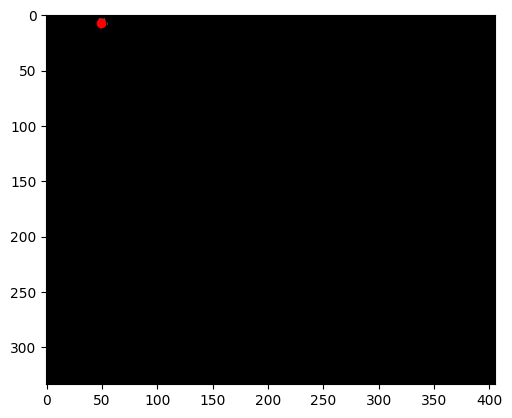

In [6]:
#detect the green circle
image_cp = image.copy()
image_cp = image_cp.astype('int32')
green_matrix = image_cp[:,:,1] - image_cp[:,:,0] - image_cp[:,:,2] - 100
green_matrix = green_matrix.clip(min=0)

all_green_positions = np.nonzero(green_matrix)

average_green_position = np.mean(all_green_positions, axis=1)

start_pos = (int(average_green_position[1]), int(average_green_position[0]))

plt.imshow(green_matrix, cmap='gray')
plt.plot(start_pos[0],start_pos[1], 'ro')


In [7]:
#detect the lines
remaining_positions = list(detected_positions.copy())

current_pos = start_pos

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("detected next_pos: ",remaining_positions[next_pos])
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)

detected next_pos:  [204 173]
detected next_pos:  [190 271]
detected next_pos:  [186 305]
detected next_pos:  [212  27]
detected next_pos:  [83 46]
detected next_pos:  [392  96]
detected next_pos:  [162 118]
detected next_pos:  [154 138]
detected next_pos:  [169 271]
detected next_pos:  [338  95]
detected next_pos:  [250 227]
detected next_pos:  [322 230]
detected next_pos:  [228 231]
detected next_pos:  [354 228]
detected next_pos:  [376 209]
detected next_pos:  [365 110]
detected next_pos:  [380 189]
detected next_pos:  [348 170]
detected next_pos:  [286 156]
detected next_pos:  [ 55 105]
detected next_pos:  [301 224]
detected next_pos:  [393 240]
detected next_pos:  [ 35 177]
detected next_pos:  [281 224]
detected next_pos:  [134  62]
detected next_pos:  [162  93]
detected next_pos:  [305 249]
detected next_pos:  [213 149]
detected next_pos:  [275 143]
detected next_pos:  [359 143]
detected next_pos:  [317  93]
detected next_pos:  [23 56]
detected next_pos:  [368 269]
detected next_

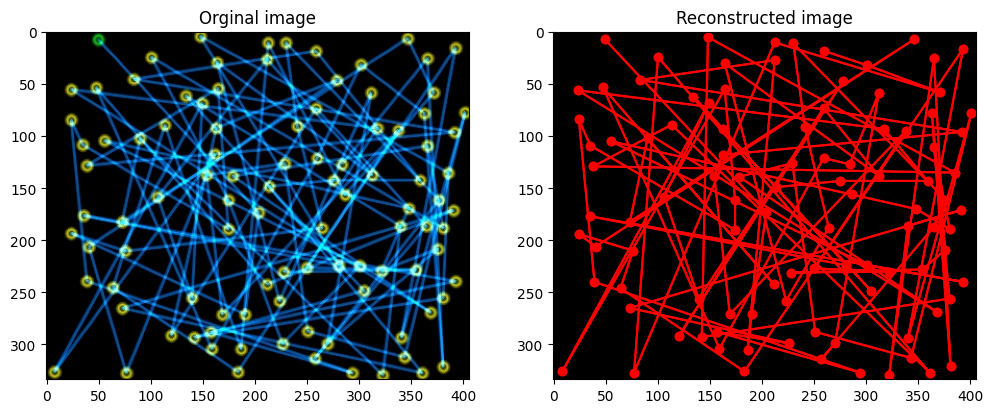

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')

In [9]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(sorted_positions)):
    lenght += np.linalg.norm(np.array(sorted_positions[i]) - np.array(sorted_positions[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  19379
Lenght of the path:  17548.698708216863


# Pathfinding solutions

In [7]:
all_positions = detected_positions.copy()
all_positions.insert(0, start_pos)

In [8]:
#get the connection matrix the smaller the value the better the connection

matr = line_detection_functions.get_connection_matrix(image,all_positions)

print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matr]))

inf	0.49330181245074867	0.40492170022371365	0.5123762376237624	0.7163561076604554	0.6657060518731989	0.8881987577639752	0.4573304157549234	0.5489667565139263	0.4023529411764706	0.5934959349593496	0.43427970557308093	0.5013623978201636	0.5994152046783625	0.4115729421352893	0.5968992248062015	0.626984126984127	0.5662251655629139	0.505283381364073	0.5866666666666667	0.6425287356321839	0.4971751412429378	0.6961538461538461	0.5130718954248366	0.5373493975903614	0.5484276729559748	0.3909348441926346	0.7569444444444444	0.5058275058275059	0.5552884615384616	0.7806267806267806	0.59465737514518	0.5476864966949953	0.5667550839964632	0.24608501118568238	0.5025025025025025	0.43186582809224316	0.7268292682926829	0.34112554112554117	0.8383333333333334	0.8465608465608465	0.5825825825825826	0.5432098765432098	0.5307328605200945	0.6336996336996337	0.4093567251461988	0.7532956685499058	0.8888888888888888	0.040935672514619936	0.5482456140350878	0.5503421309872922	0.5441988950276243	0.6298157453936348	0.68

In [12]:
print(matr.shape)
print(np.count_nonzero(matr<0.00001))

print(np.min(matr, axis=1))

(101, 101)
46
[0.04093567 0.02871795 0.04597701 0.06526807 0.01463415 0.0162037
 0.04504505 0.00409836 0.         0.00694444 0.         0.02181818
 0.         0.05732484 0.06372549 0.01297017 0.00421941 0.03457815
 0.00694444 0.         0.         0.00411523 0.05732484 0.03389831
 0.02267574 0.07922272 0.00131234 0.         0.00358423 0.
 0.00424628 0.         0.         0.         0.         0.
 0.00265604 0.         0.         0.04371585 0.01821494 0.01149425
 0.         0.03666667 0.00199601 0.01282051 0.01219512 0.
 0.00673401 0.0617284  0.         0.         0.01149425 0.07692308
 0.         0.00245098 0.         0.         0.01754386 0.
 0.00793651 0.0098401  0.01066667 0.01754386 0.0101626  0.05128205
 0.         0.         0.01863354 0.00221484 0.00358423 0.04022989
 0.00209644 0.         0.         0.00823045 0.08005822 0.00424628
 0.00409836 0.09602195 0.00793651 0.1287478  0.         0.09487179
 0.00362319 0.00224467 0.02492212 0.00929615 0.03466667 0.02035623
 0.05128205 0.

In [13]:
#should be same as solving with get_next_pos
simple_path_order, score = line_detection_functions.get_simple_best_path(matr)
print(score,simple_path_order)

9.289292562284846 [0, 48, 19, 10, 92, 89, 71, 66, 59, 20, 72, 34, 32, 31, 33, 38, 67, 42, 50, 54, 69, 35, 29, 47, 36, 82, 74, 26, 55, 57, 56, 73, 85, 21, 58, 64, 18, 9, 79, 14, 96, 5, 27, 37, 40, 39, 99, 46, 70, 28, 87, 11, 65, 63, 84, 12, 8, 44, 51, 97, 75, 43, 23, 91, 60, 80, 16, 88, 25, 53, 81, 6, 86, 52, 41, 68, 77, 30, 3, 17, 13, 22, 49, 45, 1, 93, 7, 78, 24, 15, 100, 61, 62, 76, 2, 94, 4, 98, 83, 90, 95]


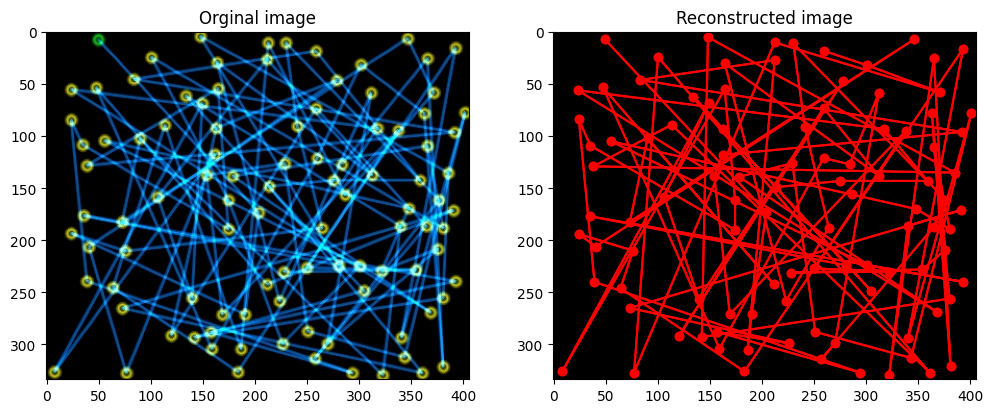

In [14]:
simple_path = [all_positions[i] for i in simple_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')

In [15]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(simple_path)):
    lenght += np.linalg.norm(np.array(simple_path[i]) - np.array(simple_path[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  19379
Lenght of the path:  17548.698708216863


## edeting the connection matrix

In [16]:
#try different functions for the connection matrix
#matr = line_detection_functions.get_connection_matrix(image,all_positions,lambda x: 1-x)

#(x/(x-1.01))**2
#also try tan()
#aslo scale the columns separately

In [9]:
backup = matr.copy()

In [18]:
matr = backup.copy()

In [19]:
matr = backup.copy()
for row in range(matr.shape[0]):
    part = matr[row]
    idx = np.argpartition(part, 4)
    #print( part[idx[0]], part[idx[1]], part[idx[2]], part[idx[3]])
    #part = part - min(part[idx[0:3]])
    
    mean = np.mean(part[idx[0:3]])
    part = part / (mean+0.0001)
    matr[row] = part


In [20]:
print('\n'.join(['\t'.join([f"{cell: 0.2f}" for cell in row]) for row in matr]))

 inf	 2.54	 2.09	 2.64	 3.69	 3.43	 4.58	 2.36	 2.83	 2.07	 3.06	 2.24	 2.58	 3.09	 2.12	 3.08	 3.23	 2.92	 2.60	 3.02	 3.31	 2.56	 3.59	 2.64	 2.77	 2.83	 2.01	 3.90	 2.61	 2.86	 4.02	 3.06	 2.82	 2.92	 1.27	 2.59	 2.23	 3.75	 1.76	 4.32	 4.36	 3.00	 2.80	 2.73	 3.27	 2.11	 3.88	 4.58	 0.21	 2.83	 2.84	 2.80	 3.25	 3.51	 1.62	 2.90	 2.59	 3.40	 1.76	 3.29	 2.71	 2.69	 4.48	 2.49	 2.97	 3.44	 2.72	 3.05	 4.59	 4.04	 4.24	 3.55	 3.33	 2.98	 3.18	 2.87	 3.86	 4.62	 3.64	 3.81	 3.67	 3.73	 3.96	 3.91	 3.86	 5.00	 3.63	 4.97	 3.86	 1.52	 4.22	 4.89	 4.40	 4.39	 4.87	 4.38	 4.66	 4.67	 4.73	 4.88	 5.05
 4.30	 inf	 5.37	 7.11	 8.07	 7.75	 7.98	 5.81	 6.97	 4.84	 5.58	 6.47	 5.76	 6.32	 4.21	 4.69	 5.47	 4.11	 5.42	 5.34	 5.04	 5.46	 3.39	 4.85	 5.25	 5.13	 5.17	 5.55	 4.27	 5.19	 4.35	 2.71	 5.10	 4.33	 5.20	 5.16	 4.80	 5.39	 3.19	 4.47	 3.14	 1.91	 2.90	 4.10	 4.27	 0.84	 4.86	 5.69	 4.65	 3.37	 2.31	 4.12	 3.84	 4.24	 5.12	 4.21	 4.25	 4.57	 4.53	 3.97	 5.41	 3.86	 5.29	 4.83	 3.77	 4.51	

## tsp library

In [21]:
#trying with travveling salesman
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_simulated_annealing
matr[:, 0] = 0
permutation, distance = solve_tsp_simulated_annealing(matr)
print(distance, permutation)

1056.3182834298532 [0, 6, 34, 96, 24, 94, 12, 84, 27, 70, 97, 42, 51, 44, 93, 13, 85, 81, 68, 60, 88, 61, 79, 82, 54, 78, 15, 52, 47, 32, 33, 31, 43, 77, 49, 66, 62, 76, 65, 69, 48, 89, 8, 19, 40, 46, 56, 95, 10, 26, 74, 16, 25, 59, 20, 87, 18, 4, 39, 91, 92, 30, 7, 67, 58, 41, 45, 29, 17, 72, 53, 9, 86, 55, 36, 100, 3, 75, 37, 21, 83, 63, 28, 1, 14, 38, 50, 80, 64, 98, 5, 99, 71, 90, 2, 73, 57, 23, 11, 22, 35]


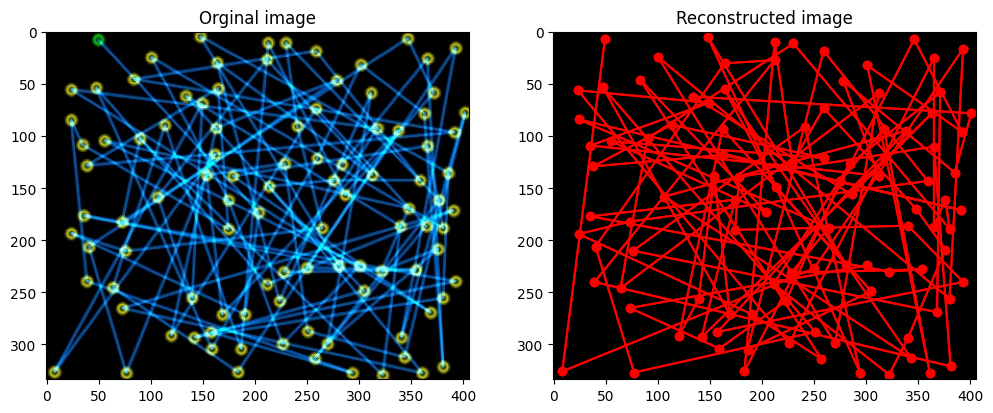

In [22]:
best_path = [all_positions[i] for i in permutation]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

In [23]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(best_path)):
    lenght += np.linalg.norm(np.array(best_path[i]) - np.array(best_path[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  19379
Lenght of the path:  18632.435437923912


## brute force

In [24]:
from line_detection_functions import get_best_path
best_path_order = get_best_path(matr,abort=0.4)
print(best_path_order)

[]


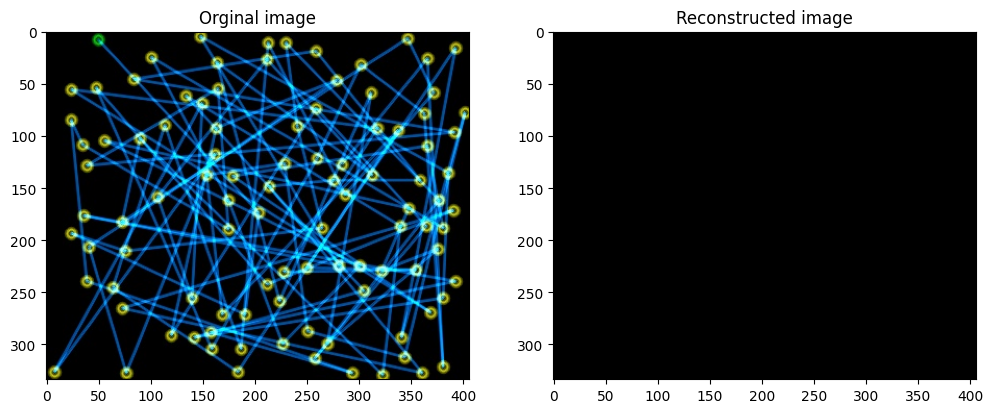

In [25]:
best_path = [all_positions[i] for i in best_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

## another brute force approach

In [14]:
def get_valid_path(connection_matrix, max_val, zero_matr=True):

    def valid_path_searcher(valid_connections, path):
        for i in valid_connections[path[-1]]:
            if i not in path:
                path.append(i)
                if len(path) == connection_matrix.shape[0]:
                    return path
                next = valid_path_searcher(valid_connections, path)
                if next is not None:
                    return next
                else:
                    path.pop()
        return None


    valid_connections = {}

    # if zero_matr is True, we subtract the minimum value of each row from the row
    if zero_matr:
        for i in range(connection_matrix.shape[0]):
            connection_matrix[i] = connection_matrix[i] - min(connection_matrix[i])

    #get all the valid connections for each point
    for i in range(connection_matrix.shape[0]):
        valid_connections[i] = np.nonzero(connection_matrix[i] < max_val)

    #sort the connections by the value of the connection
    for i in range(connection_matrix.shape[0]):
        argsorted = np.argsort(connection_matrix[i][valid_connections[i]])
        valid_connections[i] = valid_connections[i][0][argsorted]
    
    #check if everyone has at least two connection except the first and last
    one_connection = None
    for i in range(1, connection_matrix.shape[0]):
        if len(valid_connections[i]) == 0:
            raise Exception(f"Point {i} has no valid connections")
        elif len(valid_connections[i]) == 1:
            if one_connection is not None:
                raise Exception(f"Point {i} has only one valid connection, but {one_connection} also has only one valid connection")
            one_connection = i



    succes, paths = valid_path_searcher(valid_connections, [0])
    if not succes:
        raise Exception("No valid path found")
    return paths



In [16]:
#from line_detection_functions import backtrack_search
matr = backup.copy()

max_val = 0.20

result = get_valid_path(matr, max_val, zero_matr=True)

print(result)

KeyboardInterrupt: 

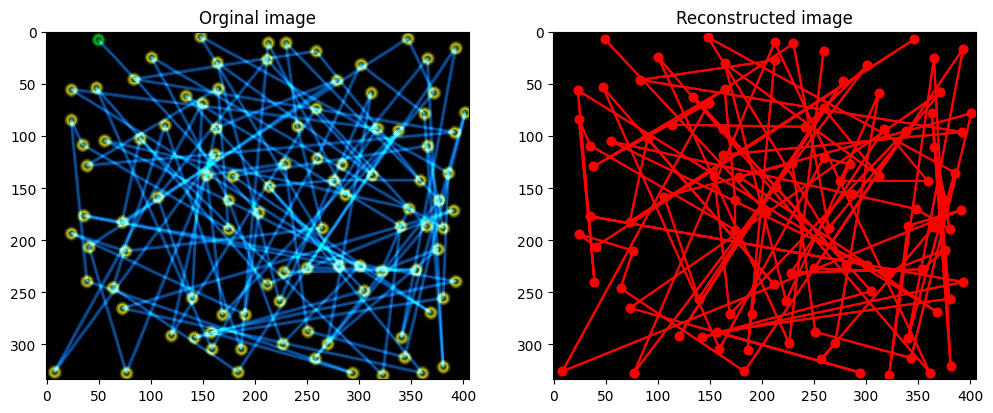

In [ ]:
best_path = [all_positions[i] for i in result]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

In [ ]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(best_path)):
    lenght += np.linalg.norm(np.array(best_path[i]) - np.array(best_path[i-1]))

print("Lenght of the path: ", lenght)

## early stuck search
check for any points that dont have more than 2 paths left

In [23]:
import gc
import copy
import random

def get_valid_path_backcheck(connection_matrix, max_val, zero_matr=True):

    original_connections = {}
    deleted_connections = {}

    def create_new_valid_connections(valid_connections, next_pos):
        deleted_connections[next_pos] = valid_connections.pop(next_pos)

        one = 0
        for node,connection in valid_connections.items():
            if next_pos in connection:
                connection.remove(next_pos)
            if len(connection) <= 1:
                #print(f"Node {node} has only {len(connection)} connection left")
                if len(connection) == 0:
                    one += 2
                one += 1
        if one >= 2:
            return True
        return False
    
    def restore_connections(valid_connections, restore_pos):
        for node,connection in valid_connections.items():
            if restore_pos in original_connections[node]:
                valid_connections[node] = [x for x in original_connections[node] if x == restore_pos or x in connection]
        valid_connections[restore_pos] = deleted_connections.pop(restore_pos)
        return None

    def valid_path_searcher(valid_connections, path):
        #print(valid_connections)
        #print(path)
        #print(len(path))
        reamining_options = list(valid_connections[path[-1]])

        #print(reamining_options)
        if len(path) >= 90:
            print(len(path),path)
            print(valid_connections)
        #the call to create_new_valid_connections will remove the next_pos from the valid_connections this will edit the dict!
        if create_new_valid_connections(valid_connections, path[-1]):
            restore_connections(valid_connections, path[-1])
            return None

        
        while len(reamining_options) > 0:
                next_pos = reamining_options.pop(0)
                path.append(next_pos)
                if len(path) == connection_matrix.shape[0]:
                    return path
                next = valid_path_searcher(valid_connections, path)
                if next is not None:
                    return next
                else:
                    path.pop()

        restore_connections(valid_connections, path[-1])
        
        return None


    valid_connections = {}

    # if zero_matr is True, we subtract the minimum value of each row from the row
    if zero_matr:
        for i in range(connection_matrix.shape[0]):
            connection_matrix[i] = connection_matrix[i] - min(connection_matrix[i])

    #get all the valid connections for each point
    for i in range(connection_matrix.shape[0]):
        valid_connections[i] = np.nonzero(connection_matrix[i] < max_val)

    #sort the connections by the value of the connection
    for i in range(connection_matrix.shape[0]):
        argsorted = np.argsort(connection_matrix[i][valid_connections[i]])
        valid_connections[i] = list(valid_connections[i][0][argsorted])
    
    #check if the first has at least one connection
    if len(valid_connections[0]) == 0:
        raise Exception(f"Point 0 has no valid connections")
    #check if everyone has at least two connection except the first and last
    one_connection = None
    for i in range(1, connection_matrix.shape[0]):
        if len(valid_connections[i]) == 0:
            raise Exception(f"Point {i} has no valid connections")
        elif len(valid_connections[i]) == 1:
            if one_connection is not None:
                raise Exception(f"Point {i} has only one valid connection, but {one_connection} also has only one valid connection")
            one_connection = i
    
    #valid_connections = create_new_valid_connections(valid_connections, 0)
    #original_connections = valid_connections.copy()
    original_connections = copy.deepcopy(valid_connections)

    path = valid_path_searcher(valid_connections, [0])
    if not path:
        raise Exception("No valid path found")
    return path



In [25]:
#from line_detection_functions import backtrack_search
matr = backup.copy()

max_val = 0.20

result = get_valid_path_backcheck(matr, max_val, zero_matr=True)

print(result)


KeyboardInterrupt: 

## backtracking

In [ ]:
#new try using the best path always.
#once we arrive at a point where the taken path is not in the original N best baths,
#we go back check where we want to go next, see where this point was taken, go back there and take the next best path
#continue from there somehow make shure it doesnt loop

In [ ]:
def test_path(connection_matrix, path, valid_connection):
    while len(path) < connection_matrix.shape[0]:
        next_score = np.inf
        for i in np.argpartition(connection_matrix[path[-1]], len)[:K]:
            if i not in path:
                if connection_matrix[path[-1]][i] < next_score:
                    next_score = connection_matrix[path[-1]][i]
                    next_pos = i
        if next_score == np.inf:
            return False, np.argpartition(connection_matrix[path[-1]], S)[:S]
        path.append(next_pos)

    return True, path

def backtrack_searcher(connection_matrix, valid_connection, path, max_val, D, maxD):
    if D >= maxD:
        return False
    success, result = test_path(connection_matrix, path, valid_connection)
    if success:
        return result
    else:
        #print(len(path),"\t",path)
        for i in range(S):
            wrong_turn = result[i]
            #print("wrong turn: ", wrong_turn)
            idx = path.index(wrong_turn)
            #print("idx: ", idx)
            new_path = path[:idx+1]
            new_path.append(wrong_turn)
            #print(new_path)
            ret = backtrack_searcher(connection_matrix, new_path, max_val, D+1, maxD)
            if ret:
                return ret
    #print("no path found")
    return False

def backtrack_search(connection_matrix, max_val, maxD, zero_matr=True):
    valid_connections = {}
    for i in range(connection_matrix.shape[0]):
        connection_matrix[i] = connection_matrix[i] - min(connection_matrix[i])
    for i in range(connection_matrix.shape[0]):
        valid_connections[i] = np.nonzero(connection_matrix[i] < max_val)
    
    backtrack_searcher(connection_matrix, [0], max_val, 0, maxD)
    return valid_connections


In [ ]:
#solution copyed from Maxime in tools.ipynb
def most_probable_path_dp(prob_matrix):
    n = prob_matrix.shape[0]  # Number of circles (nodes)
    memo = {}  # Dictionary to memoize results
    
    def dp(visited, last):
        # If the result for this state is already computed, return it
        if (visited, last) in memo:
            return memo[(visited, last)]
        
        # If all nodes are visited, return the probability of 1 and the current path
        if visited == (1 << n) - 1:
            return 1, [last]
        
        max_prob = 0  # Initialize maximum probability
        best_path = []  # Initialize best path
        
        # Explore all possible next nodes
        for i in range(n):
            # If node i is not visited
            if not visited & (1 << i):
                # Recursive call to compute the probability and path for the next state
                prob, path = dp(visited | (1 << i), i)
                prob *= prob_matrix[last, i]  # Update the probability with the current edge
                
                # Update max_prob and best_path if the current probability is higher
                if prob > max_prob:
                    max_prob = prob
                    best_path = path
        
        # Memoize the result for the current state
        memo[(visited, last)] = (max_prob, [last] + best_path)
        return memo[(visited, last)]
    
    max_prob = 0  # Initialize maximum probability for the overall best path
    best_path = []  # Initialize best path for the overall best path
    
    i = 0
    prob, path = dp(1 << i, i)  # Start with node i visited
    return path

    #not necessary since we know the staring point
    # Try starting the path from each node
    for i in range(n):
        prob, path = dp(1 << i, i)  # Start with node i visited
        # Update max_prob and best_path if the current probability is higher
        if prob > max_prob:
            max_prob = prob
            best_path = path
    
    return best_path

# Example usage
prob_matrix = np.array([
    [0, 0.8, 0.5, 0.2],  # Probabilities of paths from node 0 to other nodes
    [0.8, 0, 0.6, 0.4],  # Probabilities of paths from node 1 to other nodes
    [0.5, 0.6, 0, 0.9],  # Probabilities of paths from node 2 to other nodes
    [0.2, 0.4, 0.9, 0]   # Probabilities of paths from node 3 to other nodes
])

# Compute the most probable path
most_probable_path_dp(prob_matrix)

[0, 1, 2, 3]

In [ ]:
inv_matr = 1-matr

best_path = most_probable_path_dp(inv_matr)
print(best_path)

KeyboardInterrupt: 

## ideas left

- building chains and connecting them
- better array functions implementing hard caps at ex 0.05
- combining backtrack and chains
- beam search
- backtrack with threshold instead of top 5
- better line detection dont use RGB use HUE
- better line detection check for black pixels next to the line
- faster line detection   linspace


In [ ]:
matr = backup.copy()

In [ ]:
schwellw = 0.10
drueber = []
for row in range(matr.shape[0]):
    schw_sum = 0
    for val in range(matr.shape[1]):
        if matr[row, val] < schwellw:
            schw_sum += 1
    drueber.append(schw_sum)

print(drueber)

[0, 2, 3, 7, 0, 1, 4, 2, 3, 5, 0, 4, 3, 3, 5, 3, 2, 0, 6, 3, 5, 7, 1, 7, 9, 4, 3, 0, 7, 18, 3, 1, 4, 2, 1, 7, 0, 21, 17, 12, 1, 6, 5, 26, 4, 11, 11, 6, 10, 18, 27, 4, 1, 2, 7, 3, 19, 32, 10, 2, 7, 0, 22, 22, 11, 5, 16, 4, 5, 7, 38, 23, 29, 13, 10, 10, 23, 3, 4, 26, 54, 9, 44, 3, 9, 30, 30, 54, 15, 1, 29, 46, 38, 2, 10, 4, 49, 21, 25, 41, 49, 50, 18, 21, 21, 32, 13, 8, 0, 37, 2, 12, 16, 3, 37, 12, 36, 6, 5, 52, 13, 12, 63, 20, 43, 42, 24, 50, 49, 5, 1, 51, 35, 29, 56, 0, 20, 22, 54, 0, 1, 38, 35, 4, 38, 23, 6, 41, 12, 41, 18, 46, 6, 26, 2, 41, 9, 27, 1, 0, 6, 51, 45, 0, 24, 36, 19, 5, 6, 13, 48, 5, 17, 14, 34, 43, 34, 7, 0, 10, 4, 14, 6, 0, 21, 56, 12, 45, 37, 10, 7, 48, 34, 13, 1, 0, 9, 6, 41, 47, 2, 25, 8, 15, 1, 18, 5, 22, 14, 0, 49, 0, 20, 4, 12, 13, 3, 13, 37, 4, 3, 24, 13, 3, 12, 14, 11, 1, 3, 11, 12, 0, 3, 8, 4, 7, 7, 5, 1, 3, 0, 8, 1, 0, 1, 0, 0, 6, 7, 4, 4, 3, 8, 7, 2, 4, 4, 3, 1, 1, 2, 2, 0, 4, 0, 2, 3, 1]


In [ ]:
def factorial(n):
    fact = 1
    for num in range(2, n + 1):
        fact *= num
    return fact

i = 120
print(factorial(i)) 

6689502913449127057588118054090372586752746333138029810295671352301633557244962989366874165271984981308157637893214090552534408589408121859898481114389650005964960521256960000000000000000000000000000
